<a href="https://colab.research.google.com/github/Youjin14/data310/blob/master/TF_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
embedding_layer = layers.Embedding(1000, 5)

In [3]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[ 0.0202486 , -0.01678389, -0.02514634, -0.0439251 , -0.00861766],
       [ 0.04609007, -0.02273684,  0.00919807,  0.04256729,  0.04788243],
       [ 0.03330548, -0.00225619,  0.02300128,  0.01743573, -0.0413969 ]],
      dtype=float32)

In [4]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

In [5]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3R0XVP/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3R0XVP/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3R0XVP/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [7]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [8]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[7989,   10,   16, ...,    0,    0,    0],
       [ 681, 7728, 8044, ..., 7974, 4500, 7975],
       [2080,  387, 1326, ...,    0,    0,    0],
       ...,
       [  62,  347, 6073, ...,    0,    0,    0],
       [ 809,  110,  121, ...,    0,    0,    0],
       [  62,   27,    9, ...,    0,    0,    0]])

In [9]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.5049 - accuracy: 0.6969 - val_loss: 0.3381 - val_accuracy: 0.8850
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2821 - accuracy: 0.8844 - val_loss: 0.3621 - val_accuracy: 0.8400
Epoch 3/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2289 - accuracy: 0.9104 - val_loss: 0.3842 - val_accuracy: 0.8550
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1962 - accuracy: 0.9239 - val_loss: 0.4078 - val_accuracy: 0.8600
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1755 - accuracy: 0.9334 - val_loss: 0.4078 - val_accuracy: 0.8450
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1569 - accuracy: 0.9421 - val_loss: 0.4650 - val_accuracy: 0.8600
Epoch 7/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1433 - accuracy: 0.9486 - val_loss: 0.4937 - val_ac

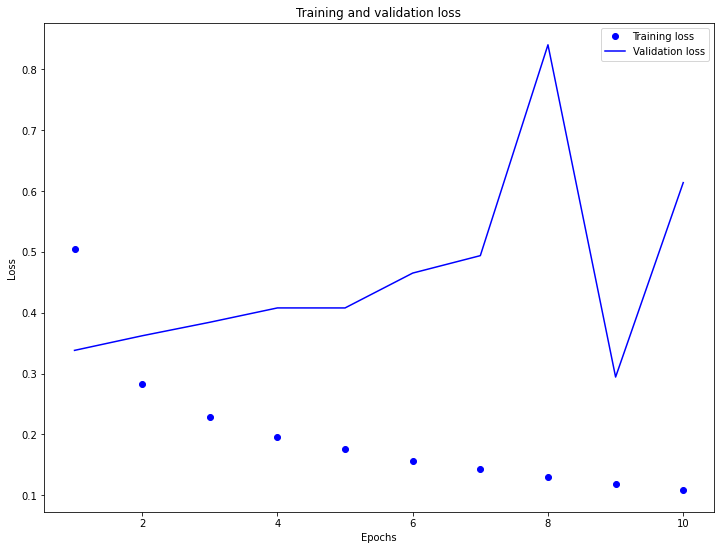

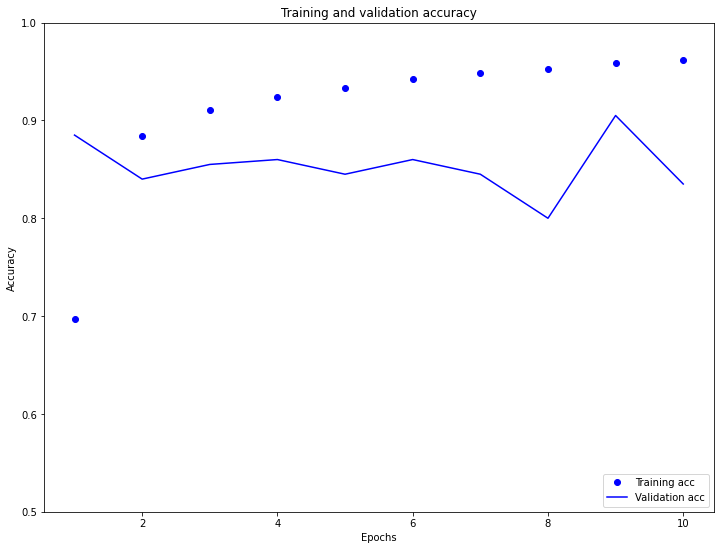

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)